# OpenCV Hough Line Transform

## How does it work?

As you know, a line in the image space can be expressed with two variables. For example:

a. In the **Cartesian coordinate system**: Parameters (m, b).

b. In the **Polar coordinate system**: Parameters (r, θ).



![hough line coordinates](./img/Hough_Lines_Tutorial_Theory_0.jpg)

For Hough Transforms, we will express lines in the *Polar system*. Hence, a line equation can be written as:

![polar line equation](./img/polar-line-equation.png)

Arranging the terms: r = x cosθ + y sinθ

In general for each point (x0, y0), we can define the family of lines that goes through that point as:

rθ = x0 ⋅ cosθ + y0 ⋅ sinθ

Meaning that each pair (rθ, θ) represents each line that passes by (x0, y0).

If for a given (x0, y0) we plot the family of lines that goes through it, we get a sinusoid. For instance, for x0 = 8 and y0 = 6 we get the following plot (in a plane θ - r):

![plot of family of lines](img/Hough_Lines_Tutorial_Theory_1.jpg)

We consider only points such that r > 0 and 0 < θ < 2π.

We can do the same operation above for all the points in an image. If the curves of two different points intersect in the plane θ - r, that means that both points belong to a same line. For instance, following with the example above and drawing the plot for two more points: x1 = 4, y1 = 9 and x2 = 12, y2 = 3, we get:

![three lines intersecting](./img/Hough_Lines_Tutorial_Theory_2.jpg)

The three plots intersect in one single point (**0.952, 9.6**), these coordinates are the parameters (θ, r) or the line in which (x0, y0), (x1, y1) and (x2, y2) lay.

What does all the stuff above mean? It means that in general, a line can be *detected* by finding the number of intersections between curves. The more curves intersecting means that the line represented by that intersection have more points. In general, we can define a *threshold* of the minimum number of intersections needed to *detect* a line.

This is what the Hough Line Transform does. It keeps track of the intersection between curves of every point in the image. If the number of intersections is above some *threshold*, then it declares it as a line with the parameters (θ, rθ) of the intersection point.

## Standard and Probabilistic Hough Line Transform

OpenCV implements two kind of Hough Line Transforms:

a. **The Standard Hough Transform**

- It consists in pretty much what we just explained in the previous section. It gives you as result a vector of couples (θ, rθ)
- In OpenCV it is implemented with the function ```HoughLines()```

b. **The Probabilistic Hough Line Transform**

- A more efficient implementation of the Hough Line Transform. It gives as output the extremes of the detected lines (x0, y0, x1, y1)
- In OpenCV it is implemented with the function ```HoughLinesP()```

## Example Code

In [10]:
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

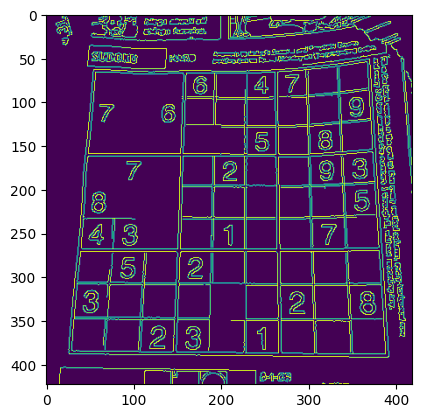

In [13]:
filename = 'img/sudoku.jpg'

# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)

# Edge detection
dst = cv.Canny(src, 50, 200, None, 3)
plt.imshow(dst)

Now we will apply the Hough Line Transform. We will explain how to use both OpenCV functions available for this purpose.

### Standard Hough Line Transform:

First, you apply the Transform:

In [8]:
# Standard Hough Line Transform
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

with the following arguments:

- *dst*: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
- *lines*: A vector that will store the parameters (r, θ) of the detected lines
- *rho*: The resolution of the parameter r in pixels. We use **1** pixel
- *theta*: The resolution of the parameter θ in radians. We use **1 degree** (np.pi/180)
- *threshold*: The minimum number of intersections to "detect" a line
- *srn* and *stn*: Default parameters to zero. Check OpenCV reference for more info.

And then you display the result by drawing the lines.

In [20]:
image = src.copy()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [21]:
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(image, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


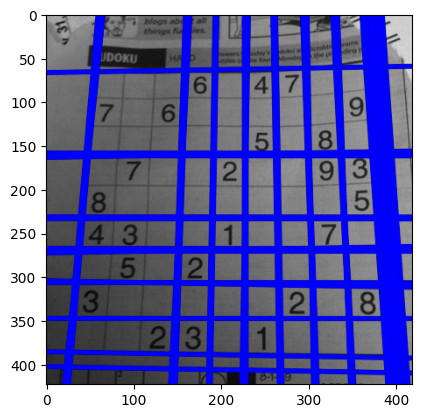

In [24]:
plt.imshow(image)

### Probabilistic Hough Line Transform

First you apply the transform:

In [25]:
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

with the arguments:
- *dst*: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
- *lines*: A vector that will store the parameters (x_start, y_start, x_end, y_end) of the detected lines
- *rho*: The resolution of the parameter r in pixxxels. We use **1** pixel.
- *theta*: The resolution of the parameter θ in radians. We use **1 degree** (np.pi / 180)
- *threshold*: The minimum number of intersections to "detect" a line
- *minLineLength*: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
- *maxLineGap*: The maximum gap between two points to be considered in the same line.

And then you display the result by drawing the lines

In [26]:
image = src.copy()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(image, (l[0], l[1]), (l[2], l[3]), (0,0, 255), 3, cv.LINE_AA)

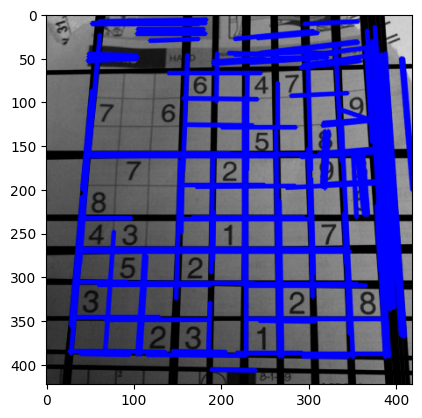

In [27]:
plt.imshow(image)

The number of lines detected vary while you change the *threshold*. Higher threshold, fewer lines will be detected (since you will need more points to declare a line detected).